In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Loading and initial checks

In [13]:
DataFrame = pd.read_csv('dynamic_pricing.csv')
df = DataFrame.copy()
df.head()
print()
print(df.info())
print()
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB
None

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.0760

##  Exploratory Data Analysis (EDA)

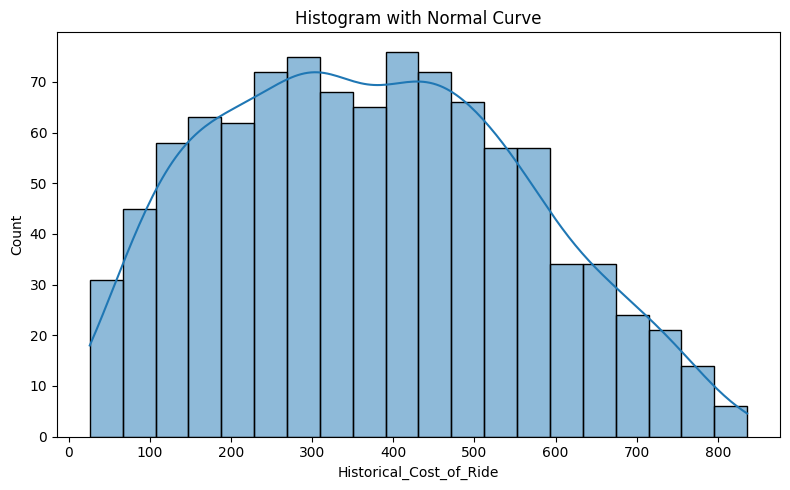

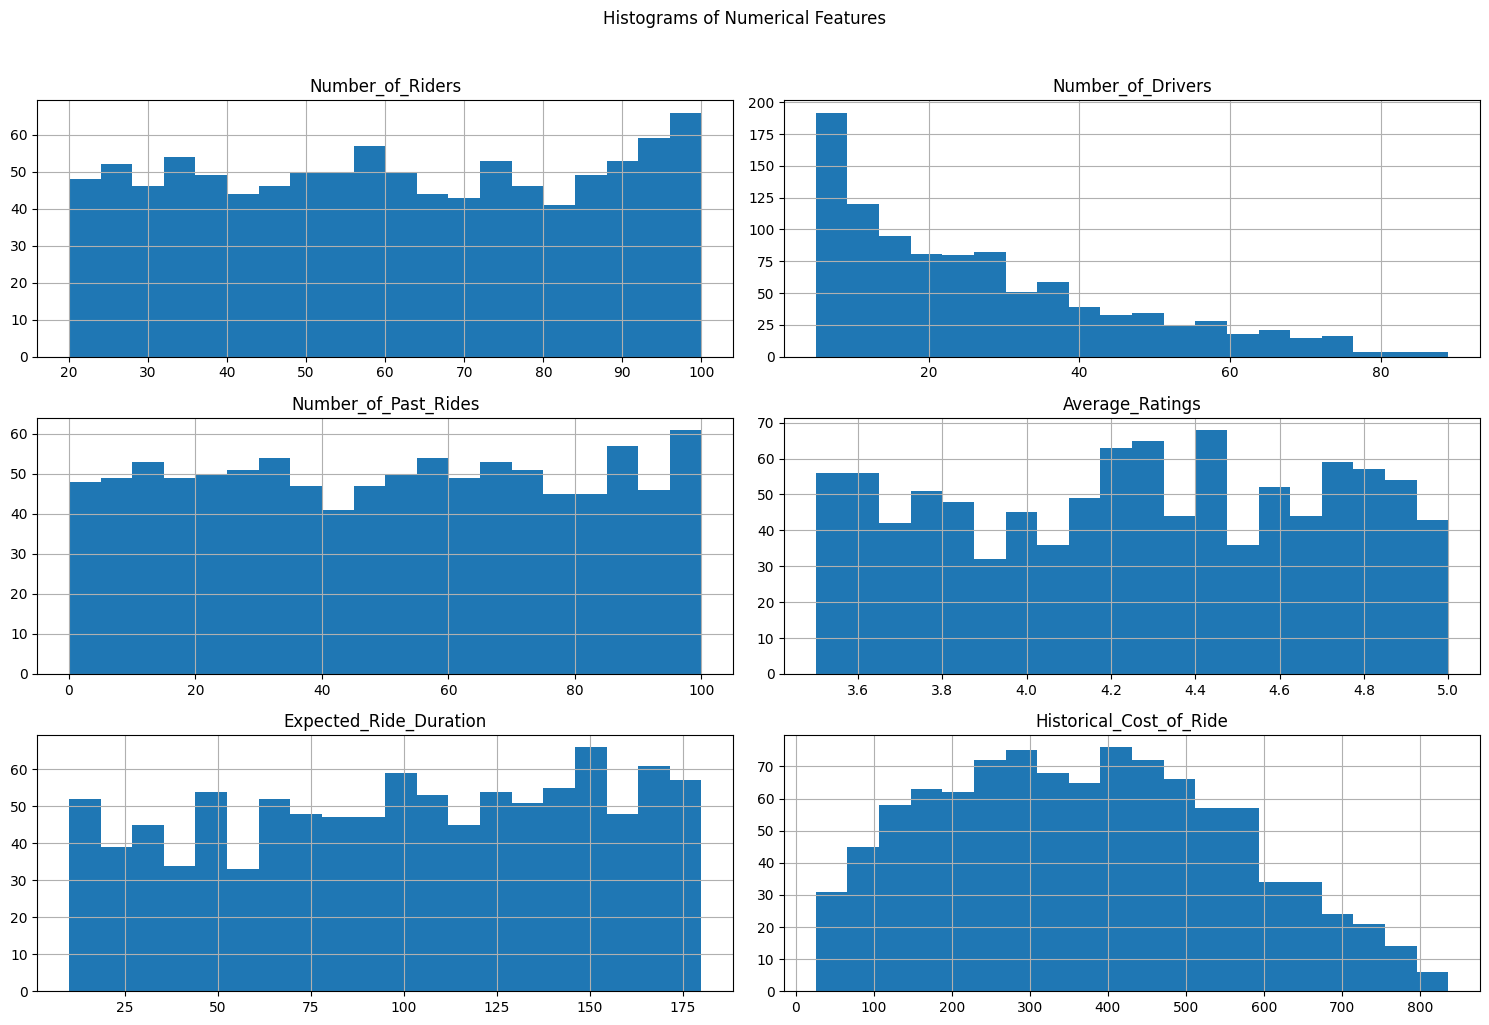

C:\Users\Manas\AppData\Local\Temp\ipykernel_70360\2288708599.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\Manas\AppData\Local\Temp\ipykernel_70360\2288708599.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\Manas\AppData\Local\Temp\ipykernel_70360\2288708599.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\Manas\AppData\Local\Temp\ipykernel_70360\2288708599.py:22: FutureWarning: 

Passing `

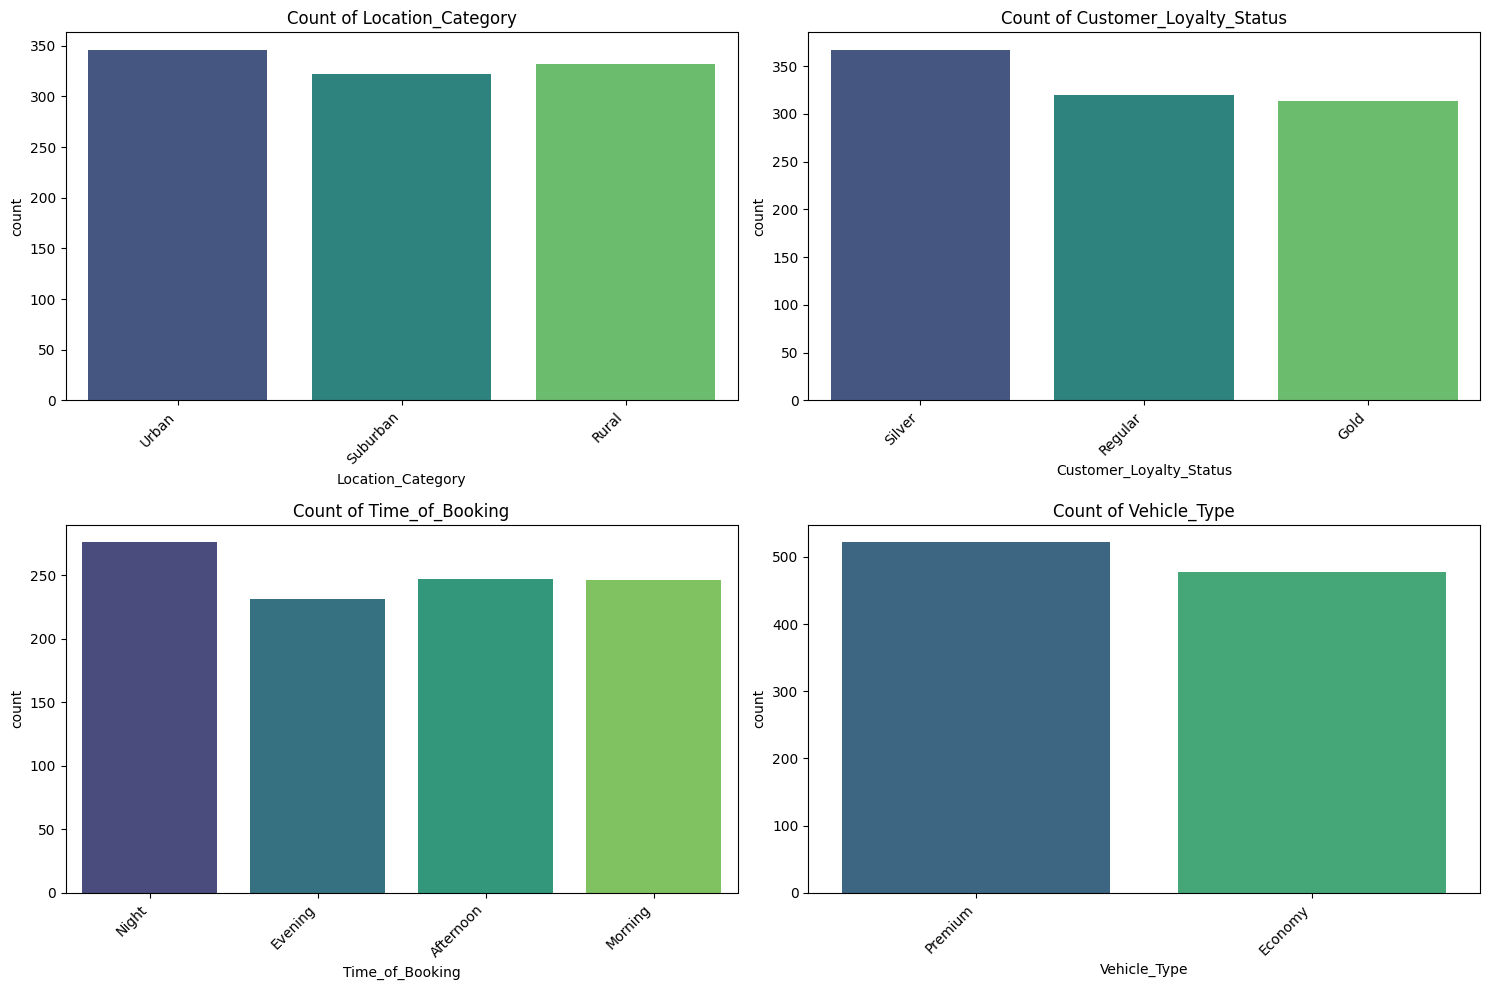

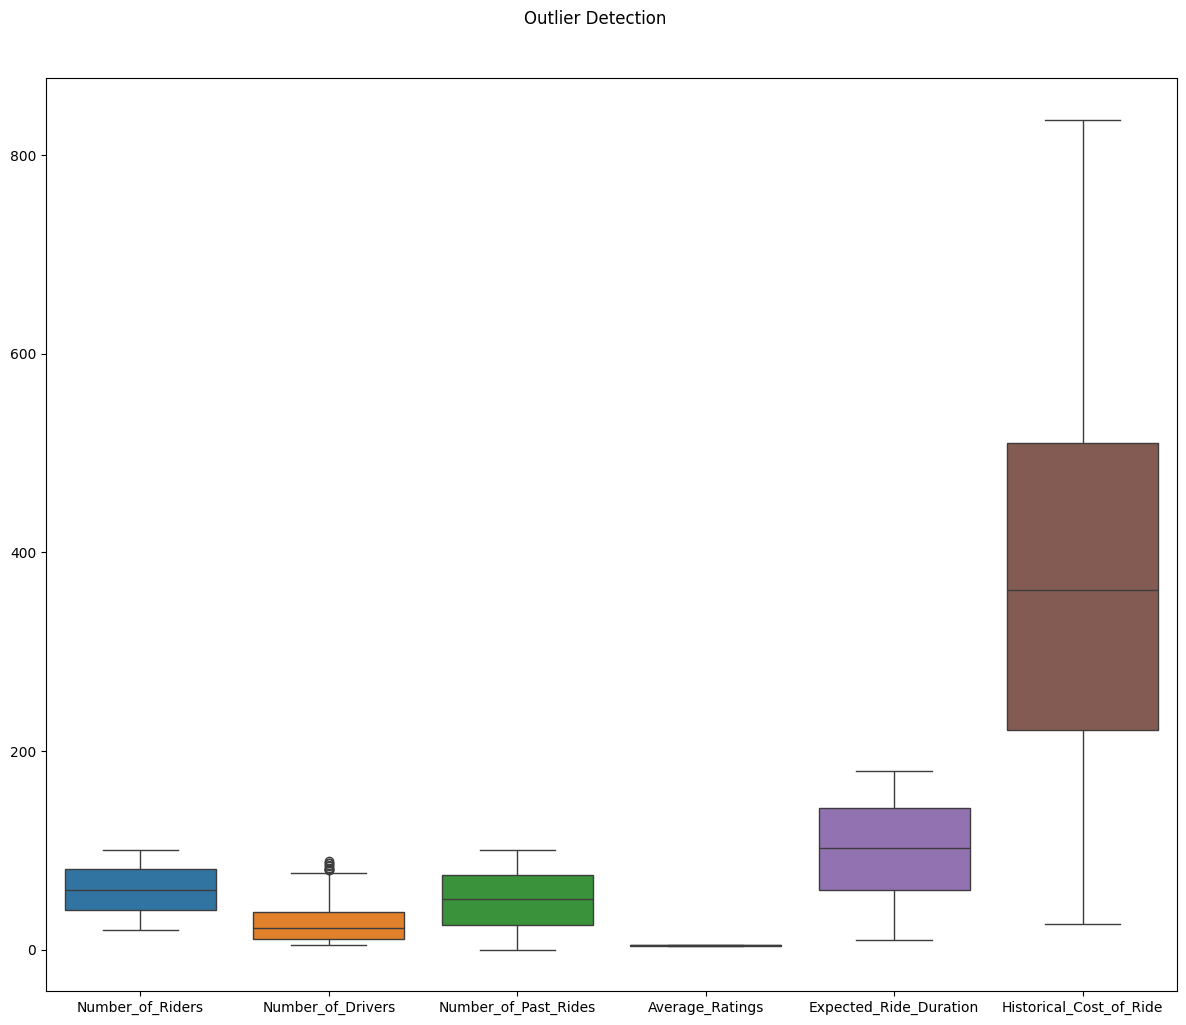

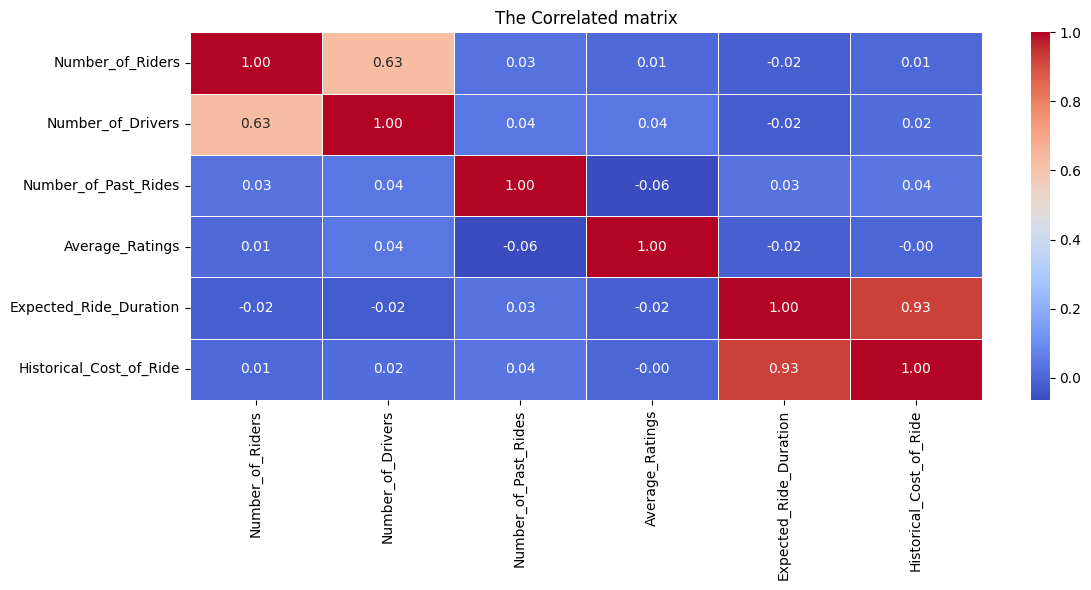

In [12]:
# Plot 1: Histogram with normal curve overlay
plt.figure(figsize=(8,5))
sns.histplot(df['Historical_Cost_of_Ride'], bins = 20, kde = True)
plt.title('Histogram with Normal Curve')
plt.tight_layout()
plt.show()
print()

# plot 2: Histogram of all the Numeric Columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
df[numerical_cols].hist(figsize=(15,10), bins = 20)
plt.suptitle('Histograms of Numerical Features', y=1.02) # Add a title
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()
print()

# plot 3: Histogram of all the Categoric Columns
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1) # Arrange plots in a grid
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap 
plt.tight_layout()
plt.show()
print()

# plot 4: A Boxplot to understand outliers in numeric columns 
plt.figure(figsize = (12,10)) 
sns.boxplot(data= df[numerical_cols])
plt.suptitle('Outlier Detection', y=1.02) # Add a title
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()
print()

# plot 5: A correlation matrix showing its relation with the target column
plt.figure(figsize = (12,6))
matrix = df[numerical_cols].corr()
sns.heatmap(matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth=0.5)
plt.title('The Correlated matrix')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [15]:
# we need to hot-encode all the category columns for the model to train on it  
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
df_encode = pd.get_dummies(df[categorical_cols])
df_encode= df_encode.astype(int)
df=pd.concat([df, df_encode], axis = 1)
df=df.drop(columns=categorical_cols)

df.rename(columns={'Historical_Cost_of_Ride': 'Total Fare'}, inplace=True)
df['Total Fare'] = df['Total Fare'].round(0)

## Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X= df.drop(columns=['Total Fare'])
y = df['Total Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)


def Reg(X1_train, X1_test, y1_train, y1_test):
    model = LinearRegression()  
    model.fit(X1_train, y1_train)
    y_pred = model.predict(X1_test)
    rsme = np.sqrt(mean_squared_error(y1_test, y_pred))
    r2 = r2_score(y1_test, y_pred)
    return rsme, r2, mean_absolute_error(y1_test, y_pred)

In [18]:
## Baseline Regression Model Metrics 
A, B, C = Reg(X1_train, X1_test, y1_train, y1_test)
print('Root Mean Sqaure Error -', A)
print('Root-Squared -', B)
print('Mean absolute error -', C)

Root Mean Sqaure Error - 65.20587479968678
Root-Squared - 0.8731919011142161
Mean absolute error - 51.61532278519053


#### Baseline Linear Regression Model Summary:
- The model captures 87% of the variance in ride fares, indicating strong predictive power.

- Generalizes well to unseen data, with low error metrics.

- Expected ride duration is identified as the most influential predictor of fare.

- Provides a simple and interpretable starting point for dynamic pricing.

- Serves as a benchmark for evaluating improvements from further feature engineering or advanced models.

## Tuning the Model

#### Lets try to understand better as which columns/features majorly affect the total fare of the ride
 We will use few measures to try to understand it 
- Correlation heatmap
- Feature scoring using Tree based models
- Mutual information 

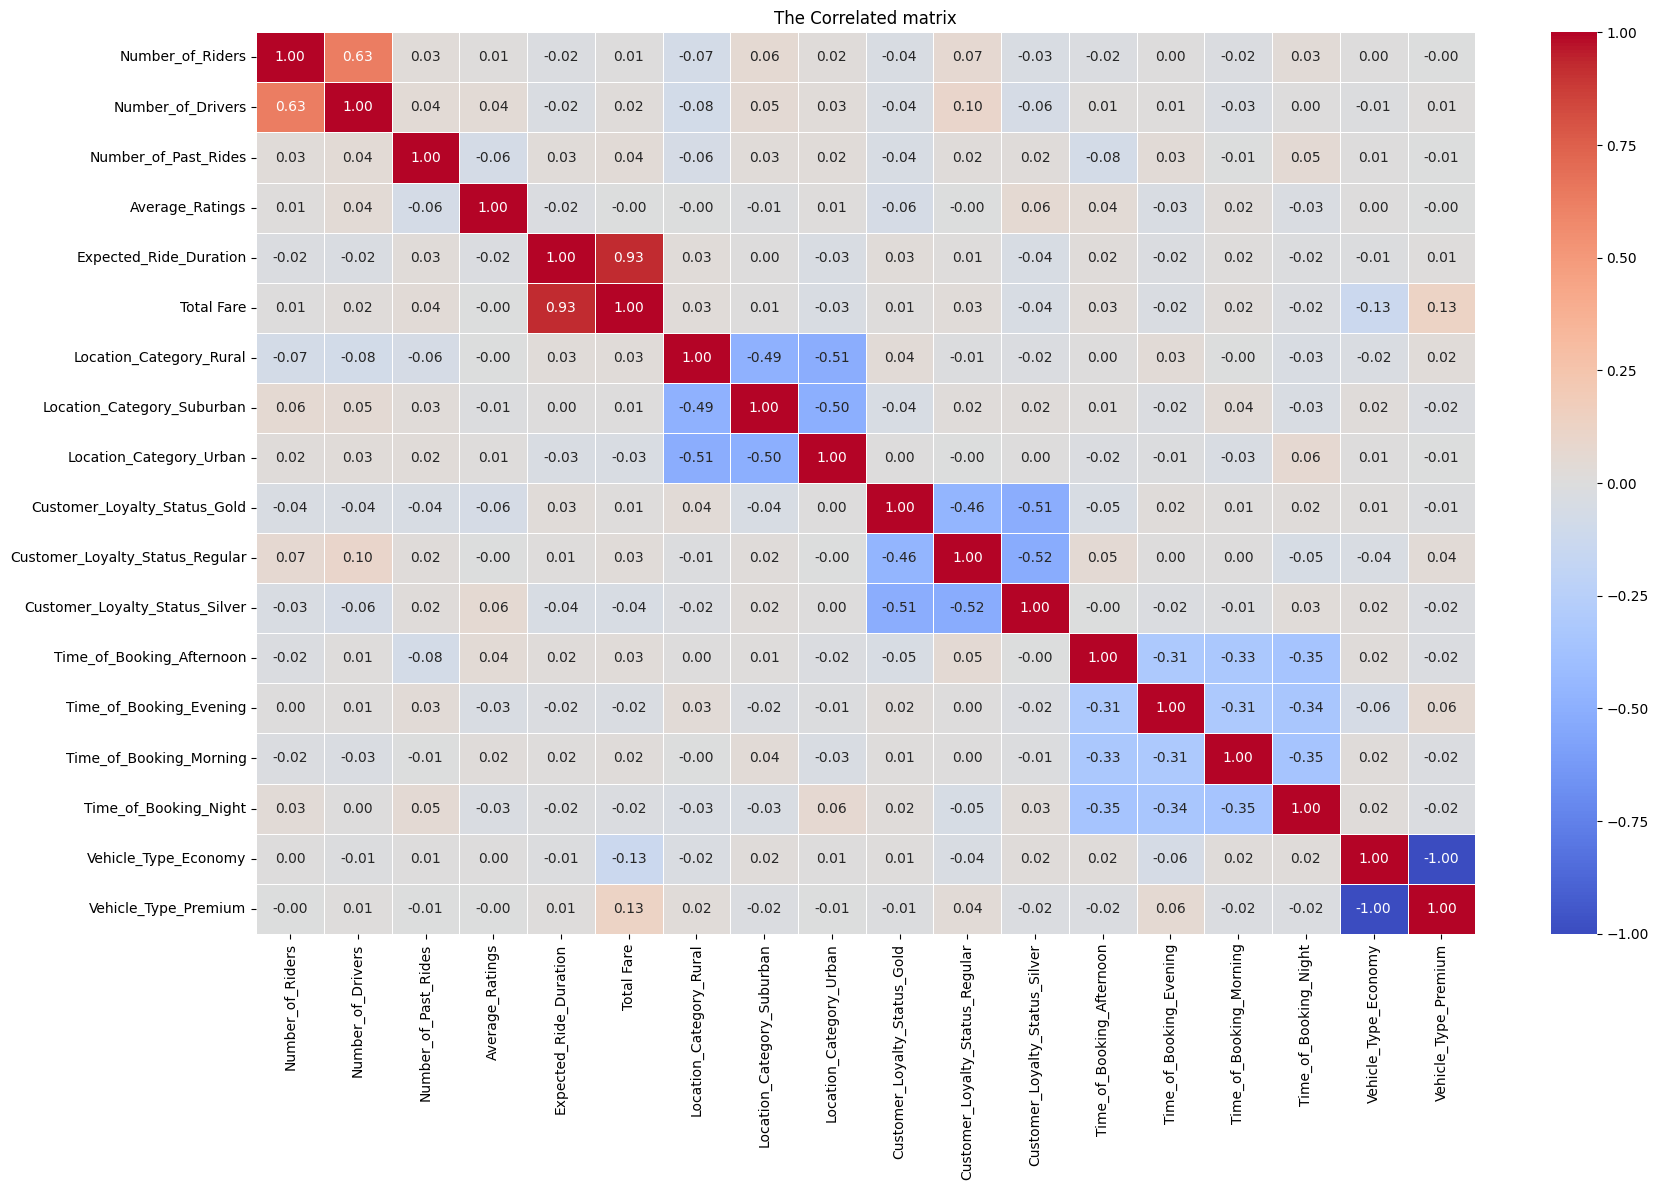


Training Random Forest Regressor to get feature importances...


C:\Users\Manas\AppData\Local\Temp\ipykernel_70360\2891025948.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance_series.values, y=sorted_importance_series.index, palette='viridis')


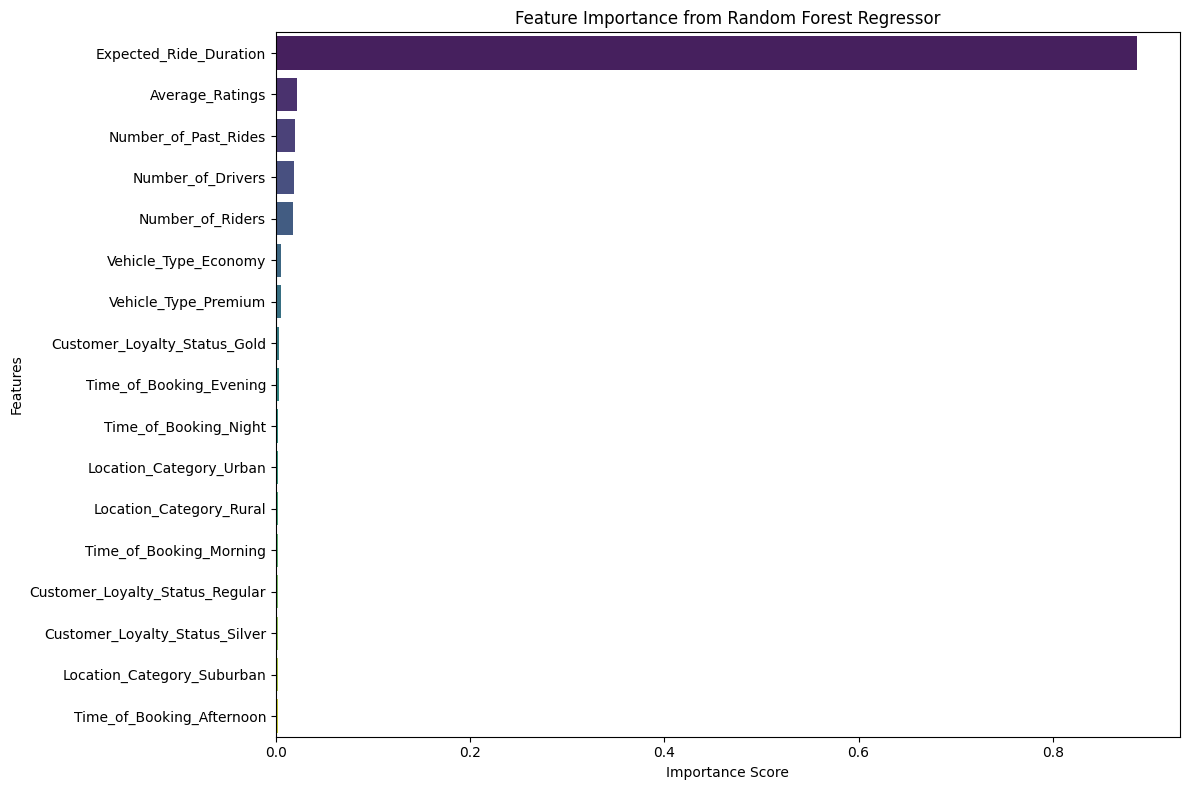


Sorted Feature Importances (from Random Forest):
Expected_Ride_Duration             0.886602
Average_Ratings                    0.021589
Number_of_Past_Rides               0.019655
Number_of_Drivers                  0.019193
Number_of_Riders                   0.018074
Vehicle_Type_Economy               0.005716
Vehicle_Type_Premium               0.005506
Customer_Loyalty_Status_Gold       0.003041
Time_of_Booking_Evening            0.002867
Time_of_Booking_Night              0.002561
Location_Category_Urban            0.002461
Location_Category_Rural            0.002390
Time_of_Booking_Morning            0.002289
Customer_Loyalty_Status_Regular    0.002051
Customer_Loyalty_Status_Silver     0.002038
Location_Category_Suburban         0.001987
Time_of_Booking_Afternoon          0.001979
dtype: float64

Calculating Mutual Information scores...
Calculation complete.


C:\Users\Manas\AppData\Local\Temp\ipykernel_70360\2891025948.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_mi_series.values, y=sorted_mi_series.index, palette='viridis')


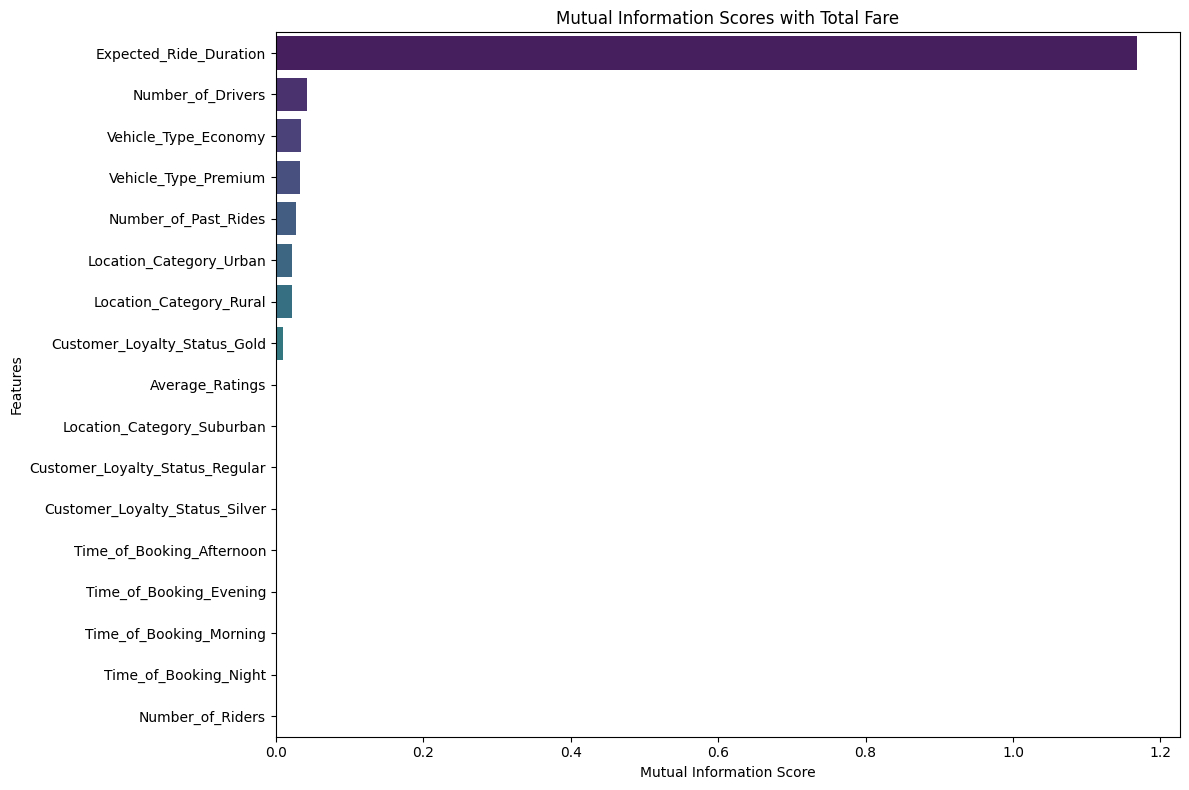


Sorted Mutual Information Scores:
Expected_Ride_Duration             1.168053
Number_of_Drivers                  0.042947
Vehicle_Type_Economy               0.033567
Vehicle_Type_Premium               0.033042
Number_of_Past_Rides               0.028106
Location_Category_Urban            0.022212
Location_Category_Rural            0.022198
Customer_Loyalty_Status_Gold       0.009398
Average_Ratings                    0.000451
Location_Category_Suburban         0.000000
Customer_Loyalty_Status_Regular    0.000000
Customer_Loyalty_Status_Silver     0.000000
Time_of_Booking_Afternoon          0.000000
Time_of_Booking_Evening            0.000000
Time_of_Booking_Morning            0.000000
Time_of_Booking_Night              0.000000
Number_of_Riders                   0.000000
dtype: float64


In [21]:
# Measure 1: Correlation heatmap matrix
plt.figure(figsize = (18,12))
matrix = df.corr()
sns.heatmap(matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth=0.5)
plt.title('The Correlated matrix')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()
print()

# Measure 2: Feature Scoring
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Training Random Forest Regressor to get feature importances...")
model_rf.fit(X1_train, y1_train)
feature_importances = model_rf.feature_importances_
feature_names = X_train.columns
importance_series = pd.Series(feature_importances, index=feature_names)
sorted_importance_series = importance_series.sort_values(ascending=False)
# --- Visualizing Feature Importances ---
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importance_series.values, y=sorted_importance_series.index, palette='viridis')
plt.title('Feature Importance from Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() 
print("\nSorted Feature Importances (from Random Forest):")
print(sorted_importance_series)
print()

# Measure 3: 
from sklearn.feature_selection import mutual_info_regression
print("Calculating Mutual Information scores...")
mi_scores = mutual_info_regression(X_train, y_train, random_state=42, n_jobs=-1)
print("Calculation complete.")
feature_names = X_train.columns
mi_series = pd.Series(mi_scores, index=feature_names)
sorted_mi_series = mi_series.sort_values(ascending=False)

plt.figure(figsize=(12, 8)) 
sns.barplot(x=sorted_mi_series.values, y=sorted_mi_series.index, palette='viridis')
plt.title('Mutual Information Scores with Total Fare')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

print("\nSorted Mutual Information Scores:")
print(sorted_mi_series)

### Key observations
- Expected_Ride_Duration is by far the most important feature, explaining nearly 90% of the fare variability.

- Average_Ratings, Number_of_Past_Rides, Number_of_Drivers, and Number_of_Riders have minor but noticeable influence.

- All other features (vehicle type, time of booking, location, loyalty status) contribute very little to fare prediction.

- Dropping low-importance features will simplify the model with almost no loss in accuracy.

- Focusing on the top features ensures an efficient and interpretable dynamic pricing model.

In [27]:
# testing the Regression model on the 6 important features that greatly affect the total Fare
X= df[['Expected_Ride_Duration', 'Vehicle_Type_Premium','Number_of_Past_Rides', 'Average_Ratings', 'Number_of_Riders', 'Number_of_Drivers']]
y = df['Total Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

def Reg1(X1_train, X1_test, y1_train, y1_test):
    model = LinearRegression()  
    model.fit(X1_train, y1_train)
    y_pred = model.predict(X1_test)
    rsme = np.sqrt(mean_squared_error(y1_test, y_pred))
    r2 = r2_score(y1_test, y_pred)
    return rsme, r2, mean_absolute_error(y1_test, y_pred)

In [28]:
## Metrics using only the important features
A, B, C = Reg1(X1_train, X1_test, y1_train, y1_test)
print('Root Mean Sqaure Error -', A)
print('Root-Squared -', B)
print('Mean absolute error -', C)

Root Mean Sqaure Error - 64.66566913004932
Root-Squared - 0.8752843106065081
Mean absolute error - 50.90885406389252


#### We can see a slight improvement in the performance of the model, even though we removed 60% of the input features.
This shows that the model is highly dependent on these 6 features.
Thus I came to the conclusion to remove the rest of the columns in order to keep the model complexity simple and better train the model

## Model Evaluation 

In [32]:
## Final Model Evaluation on the hold off test data 
model = LinearRegression()  
model.fit(X1_train, y1_train)
y_pred = model.predict(X_test)
rsme = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print('Root Mean Sqaure Error -', rsme)
print('Root-Squared -', r2)
print('Mean absolute error -', MAE)

Root Mean Sqaure Error - 67.16999997564005
Root-Squared - 0.8762673596110286
Mean absolute error - 52.14775191378628


In [33]:
#Saving the Model
import joblib
filename = 'Uber Price Prediction Model'
joblib.dump(model, filename)
print(f"\nFinal model successfully saved to '{filename}'")


Final model successfully saved to 'Uber Price Prediction Model'


## Conclusion
The fare for ride-sharing is overwhelmingly determined by the expected ride duration, with other factors such as ratings, ride history, driver and rider counts contributing only marginally. Simplifying the pricing model to focus on ride duration and a few secondary features maintains high predictive accuracy while improving model efficiency and interpretability

- The dynamic pricing model accurately predicts ride fares, achieving strong performance metrics (R² ≈ 0.87, low RMSE/MAE) on both validation and test sets.

- Expected ride duration is by far the most influential factor in determining fare, accounting for nearly 90% of predictive power.

- Other features (such as ratings, ride history, number of drivers/riders) contribute only marginally; most remaining features have negligible impact.

- Additional feature engineering or inclusion of more variables did not significantly improve model performance.

- The final model is simple, interpretable, and generalizes well to unseen data, effectively meeting the project’s business and technical objectives.

- Future improvements could explore external real-time data (e.g., weather, events) if available, but the current solution is robust and ready for deployment.